# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score
from numpy.random import RandomState

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def dano(df):
    display(df.head())
    display(df.info(),
            'Количество пропусков:', df.isna().sum(),
            'Количество дубликатов:', df.duplicated().sum(),
            'Корреляция данных', df.corr()
           )

In [4]:
print("Данные первого региона")
dano(geo_data_0)

Данные первого региона


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Количество дубликатов:'

0

'Корреляция данных'

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [5]:
print("Данные второго региона")
dano(geo_data_1)

Данные второго региона


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Количество дубликатов:'

0

'Корреляция данных'

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [6]:
print("Данные третьего региона")
dano(geo_data_2)

Данные третьего региона


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Количество дубликатов:'

0

'Корреляция данных'

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Нам представленна три датасета, в каждом по `100 000` строк, пропуски и дубликаты отсутствуют.
столбец `id` - уникальный идентификатор скважин, для обучения модели и предсказания прибыльности региона не понадобится, и в дальнейшем его можно убрать.
<br> Более детально перед работой изучим столбец `product` - показатель обьема запасов.
<br> `product` - целевой признак
<br> `f0, f1, f2` - признаки для модели


In [7]:
geo_data_0 = geo_data_0.drop(['id'] , axis=1)
geo_data_1 = geo_data_1.drop(['id'] , axis=1)
geo_data_2 = geo_data_2.drop(['id'] , axis=1)

Построю гистограммы обьемов запасов нефти в регионах

In [8]:
def product_oil(data, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(data, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем запасов, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

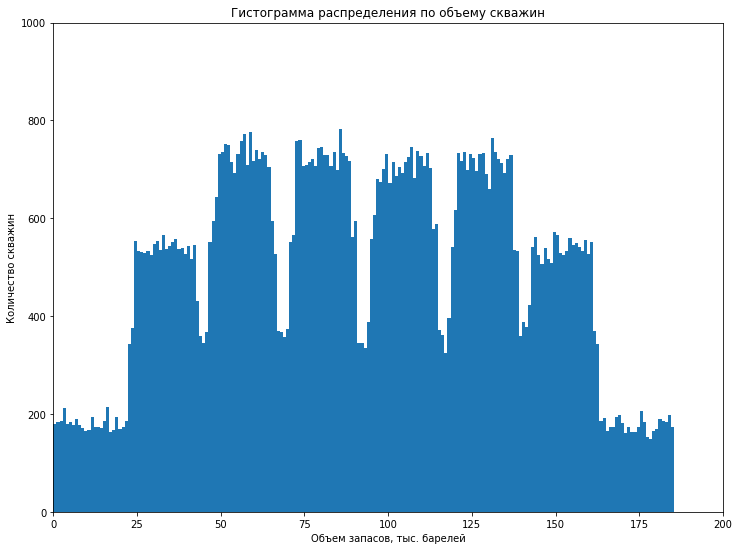

In [9]:
product_oil(geo_data_0['product'], 200, 200, 1000)

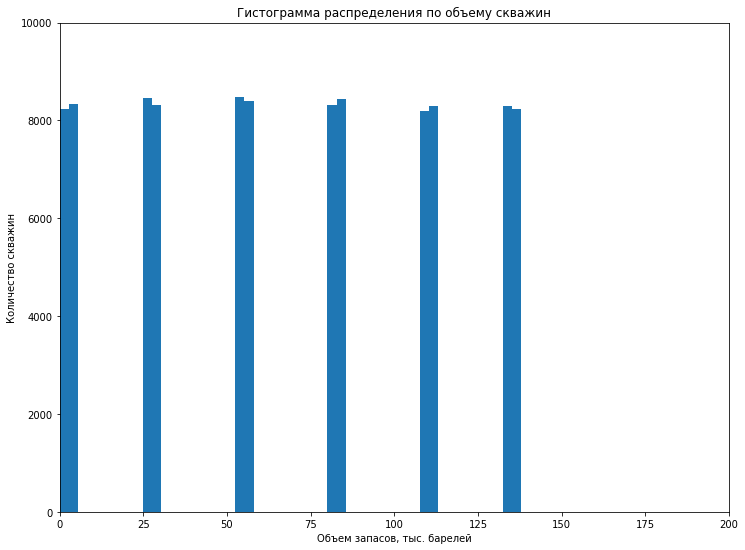

In [10]:
product_oil(geo_data_1['product'], 50, 200, 10000)

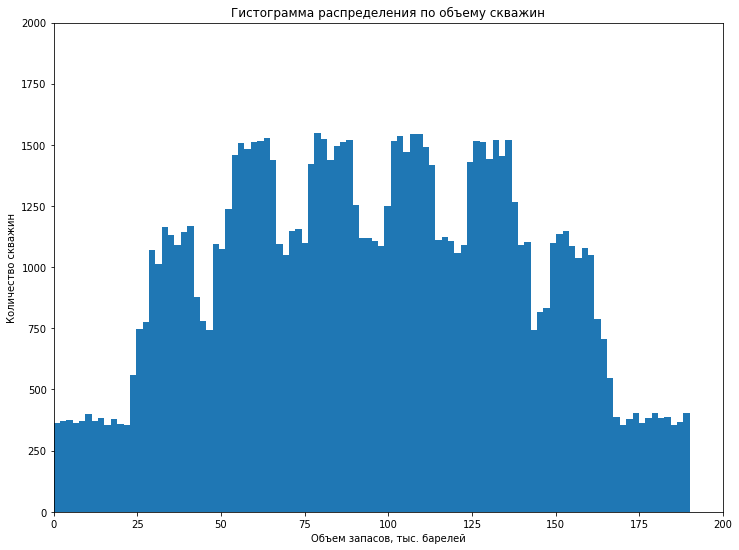

In [11]:
product_oil(geo_data_2['product'], 100, 200, 2000)

**Вывод**
<br>Данные подготовлены для модели
<br>По гистограммам видно что у первого и третьего региона распределение скважин близко к нормальному. Во втором регионе распределение скважин выглядит непонятным - одинаковое количество скважин 8000-8500шт на каждый шаг выборки количества обьема запасов.

In [12]:
from pandas_profiling import ProfileReport

In [39]:
geo_data_1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import sweetviz as sv

In [15]:
sv_geo_data_0 = sv.analyze([geo_data_0, " Permit Logs"])

                                             |          | [  0%]   00:00 -> (? left)

In [38]:
sv_geo_data_0.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Обучение и проверка модели

In [17]:
model = LinearRegression()
table_rmse = []
table_true_mean = []
table_predict_mean = []
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    model.fit(features_train, target_train)
    predic = model.predict(features_valid)
    data = {'true_product' : target_valid,
            'predicted_product' : predic         
    }
    geo_data = pd.DataFrame(data, columns = ['true_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predic)**0.5
    mean = geo_data['predicted_product'].mean()
    true_mean = geo_data['true_product'].mean()
    table_rmse.append(rmse)
    table_true_mean.append(true_mean)
    table_predict_mean.append(mean)
    
    return geo_data, rmse, mean

Для проверки модели проверим показатель RMSE

In [18]:
geo_data_vs_0, rmse_0, mean_0 = test_split(geo_data_0, 'product')
print("В первом регионе")
display(geo_data_vs_0)
print("RMSE:", rmse_0)
print("Cредний запас предсказанного сырья:", mean_0)
print("Cредний запас реальных ответов:", geo_data_vs_0['true_product'].mean())

В первом регионе


,true_product,predicted_product
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


RMSE: 37.5794217150813
Cредний запас предсказанного сырья: 92.59256778438035
Cредний запас реальных ответов: 92.07859674082927


In [19]:
geo_data_vs_1, rmse_1, mean_1 = test_split(geo_data_1, 'product')
print("Во втором регионе")
display(geo_data_vs_1)
print("RMSE:", rmse_1)
print("Cредний запас предсказанного сырья:", mean_1)
print("Cредний запас реальных ответов:", geo_data_vs_1['true_product'].mean())

Во втором регионе


,true_product,predicted_product
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
...,...,...
12581,137.945408,136.869211
18456,110.992147,110.693465
73035,137.945408,137.879341
63834,84.038886,83.761966


RMSE: 0.893099286775617
Cредний запас предсказанного сырья: 68.728546895446
Cредний запас реальных ответов: 68.72313602435997


In [20]:
geo_data_vs_2, rmse_2, mean_2 = test_split(geo_data_2, 'product')
print("В третьем регионе")
display(geo_data_vs_2)
print("RMSE:", rmse_2)
print("Cредний запас предсказанного сырья:", mean_2)
print("Cредний запас реальных ответов:", geo_data_vs_2['true_product'].mean())

В третьем регионе


,true_product,predicted_product
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


RMSE: 40.02970873393434
Cредний запас предсказанного сырья: 94.96504596800489
Cредний запас реальных ответов: 94.88423280885438


In [21]:
table_comp = pd.DataFrame(data = (table_rmse, table_true_mean, table_predict_mean),
                          columns = ['geo_0', 'geo_1', 'geo_2'],
                          index =['rmse', 'запас сырья', 'предсказание запаса сырья'])


**Вывод**

In [22]:
table_comp

,geo_0,geo_1,geo_2
rmse,37.579422,0.893099,40.029709
запас сырья,92.078597,68.723136,94.884233
предсказание запаса сырья,92.592568,68.728547,94.965046


При разных показателях RMSE 

Модель практически без ошибок предсказывает запас сырья скважин. Во втором регионе предсказания запасов сырья практически совпадают с реальными, RMSE=0.89, но так же самый низкий средний запас сырья, делает регион менее привлекательным для вложений.
В дальнейшем выбор места разработки скважин будет идти между 1 и 3 регионами.


## Подготовка к расчёту прибыли

In [23]:
check_points = 500
best_check_points = 200
cash = 1e+07
price_barel = 450

In [24]:
mean_cash_points = cash / best_check_points
print('Средние затраты на 1 скважину:', mean_cash_points)
mean_oil_count = mean_cash_points / price_barel
print('Средние количество баррелей на 1 скважину:', mean_oil_count)

Средние затраты на 1 скважину: 50000.0
Средние количество баррелей на 1 скважину: 111.11111111111111


Для окупаемости региона, требуется что бы средннее кол-во запасса сырья было 111тыс. бараллей.
<br>Для оценки показателей региона построю гистограмму средне-предсказанных показателей скважин регионов

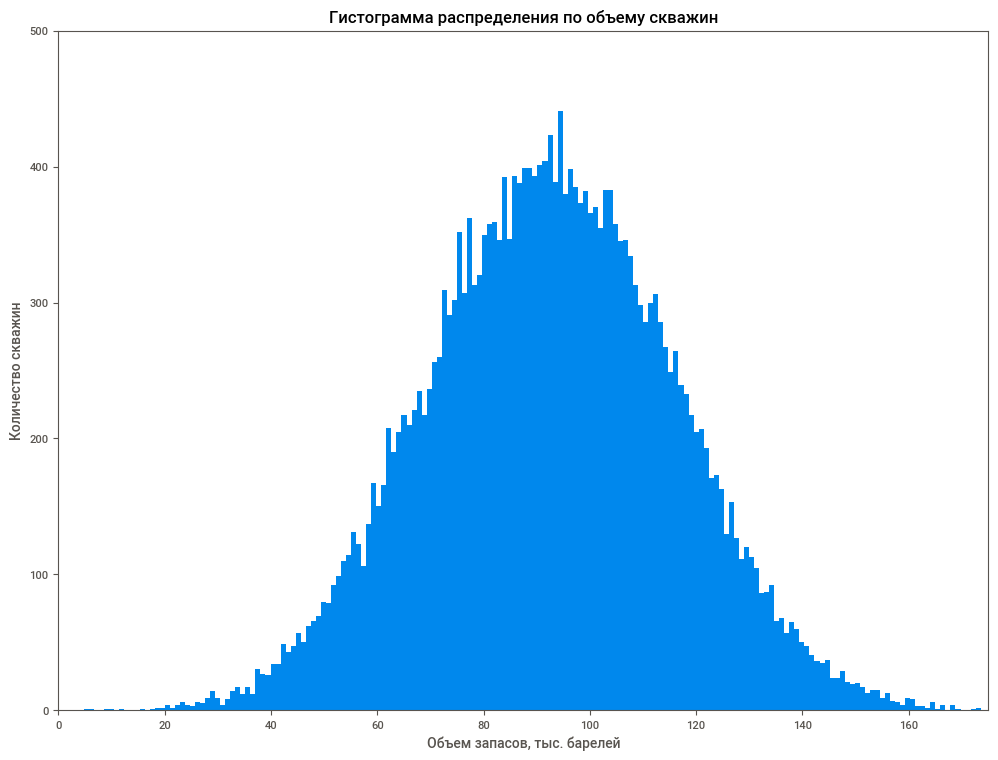

In [25]:
product_oil(geo_data_vs_0['predicted_product'], 200, 175, 500)

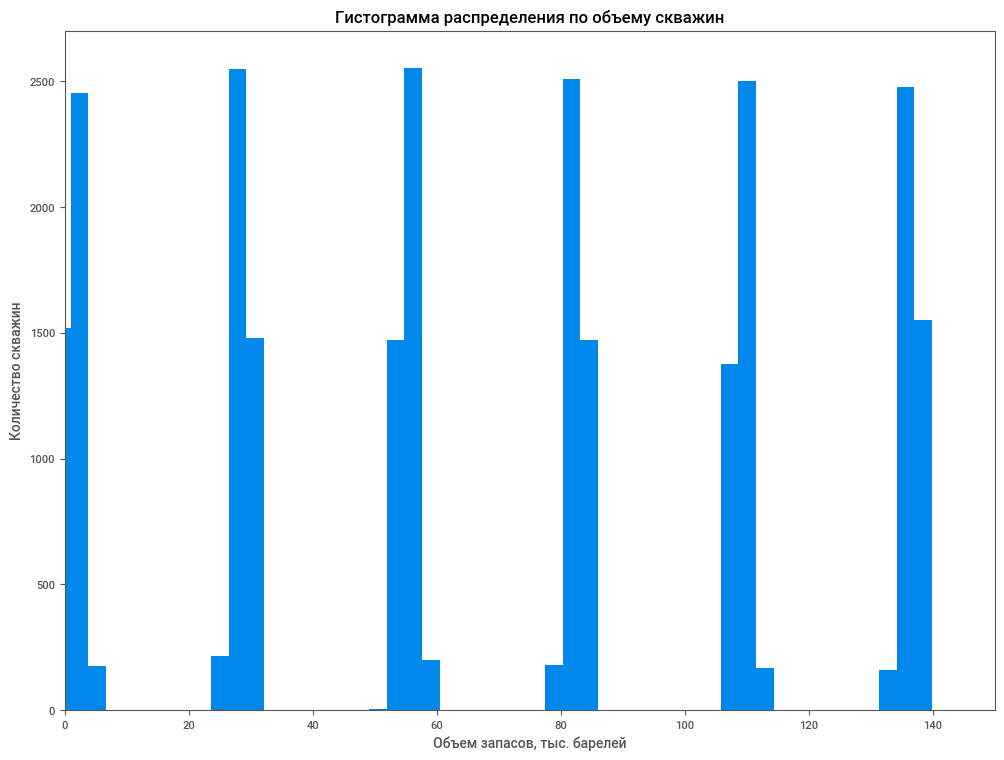

In [26]:
product_oil(geo_data_vs_1['predicted_product'], 50, 150, 2700)

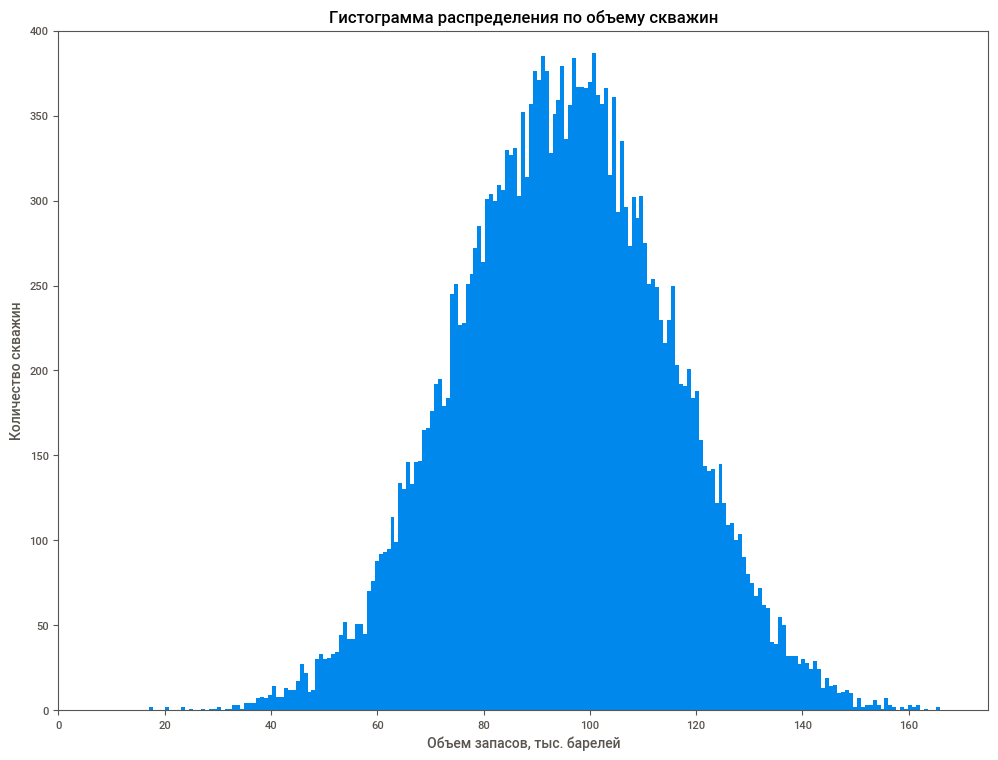

In [27]:
product_oil(geo_data_vs_2['predicted_product'], 200, 175, 400)

In [28]:
geo_data_vs_0[geo_data_vs_0['predicted_product'] > 111.111].count()

true_product         5389
predicted_product    5389
dtype: int64

In [29]:
geo_data_vs_1[geo_data_vs_1['predicted_product'] > 111.111].count()

true_product         4594
predicted_product    4594
dtype: int64

In [30]:
geo_data_vs_2[geo_data_vs_2['predicted_product'] > 111.111].count()

true_product         5234
predicted_product    5234
dtype: int64

Можно сделать вывод:
   - 2 регион достаточно рискован, так как согласно имеющимся данным в регионе больше шансовв наткнуться на скважину с более низкими показателями среднего запаса сырья
   - 1 и 3 регионы же дают шанс на окупаемость вложений, так как распределение по запасам между имеющимися скваженнами равномерные.
   - Однако по количеству скважин имеющих средний запас сырья для окупаемости, больше подойдут 2 и 3 регионы

## Расчёт прибыли и рисков 

In [31]:
def oil_profit_calculation(target, probabilities):
    sort_predict = probabilities.sort_values(ascending=False)
    sort_predict_200 = target[sort_predict.index][:200]
    cash_points = price_barel * sort_predict_200.sum() - cash
    return cash_points

In [32]:
state = RandomState(12345)
mean_table = [] 
lower_table = []
upper_table = []
risk_table = []
def bootstrap_1000(target, probs):
    values=[]
    count = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=check_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample)
        if profit < 0:
            count +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = round(values.quantile(0.025), 3)
    upper = round(values.quantile(0.975), 3)
    mean = round(values.mean(), 3)
    risk = round(count / 1000 * 100, 3)
    mean_table.append(mean)
    lower_table.append(lower)
    upper_table.append(upper)
    risk_table.append(risk)
    return mean, lower, upper, risk

In [33]:
mean_0, lower_0, upper_0, risk_0 = bootstrap_1000(geo_data_vs_0['true_product'], 
                                                     geo_data_vs_0['predicted_product'])

In [34]:
mean_1, lower_1, upper_1, risk_1 = bootstrap_1000(geo_data_vs_1['true_product'], 
                                                     geo_data_vs_1['predicted_product'])

In [35]:
mean_2, lower_2, upper_2, risk_2 = bootstrap_1000(geo_data_vs_2['true_product'], 
                                                     geo_data_vs_2['predicted_product'])

In [36]:
table_risk = pd.DataFrame(data=(mean_table, lower_table, upper_table, risk_table),
                         columns = ['Регион 1', 'Регион 2', 'Регион 3'],
                         index = ['Средняя прибыль', 'Доверительный интервал от', 'Доверительный интервал до', '% Риска'])

In [37]:
table_risk

,Регион 1,Регион 2,Регион 3
Средняя прибыль,396164.985,461155.817,392950.475
Доверительный интервал от,-111215.546,78050.811,-112227.625
Доверительный интервал до,909766.942,862952.060,934562.915
% Риска,6.900,0.700,6.500


**Вывод**
- В 1 и 3 регионах риски составляют 6,9% и 6,5%, при искомом менее 2,5%
- Лучший регион для разработки скважин - **2 регион** риск вложений в данном регионе самый низкий 0,7 что соответствует запросу.
- Доверительный интервал показывает, что при наихудшей разработке скважин, вложения всеравно окупятся. И хотя при анализе данных казалось что с ними что то не так в итоге показатели 2 региона значительно выше для финального выбора региона.